**Time Series Forecasting**<br>
The process of using a statistical model to predict future values of a time series based on past results and present data. For our model we used **ARIMA** model, which stands for **AutoRegressive Integrated Moving Average.**

Loading the imports and library

In [1]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore") 
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['date.epoch'] = '0000-12-31'


**Loading the CSV file as a data frame. Indexing using the dates in the date column**

In [2]:
datafram = pd.read_csv('TotalUSdaily.csv',index_col='date', parse_dates=True)

datafram.head()

,US_COVID-19_Cases
date,
2020-03-21,6885
2020-03-22,9259
2020-03-23,11442
2020-03-24,10632
2020-03-25,12873


Using the seasonal decompose function **(ETS decomposition)** we will break down the graph into distinct pieces. The term ETS stands for Error, Trend, and Seasonality. 

**Error** :  random fluctuations in the time series data which become evident when trend and cyclical variations are removed <br>
**Trend:** shows a general direction of the time series data over a long period of time. <br>
**Seasonality:** seasonal componet that repeats with respect to time over fixed intervals. For example, the number of ice cream sales in the summer is always higher than other months


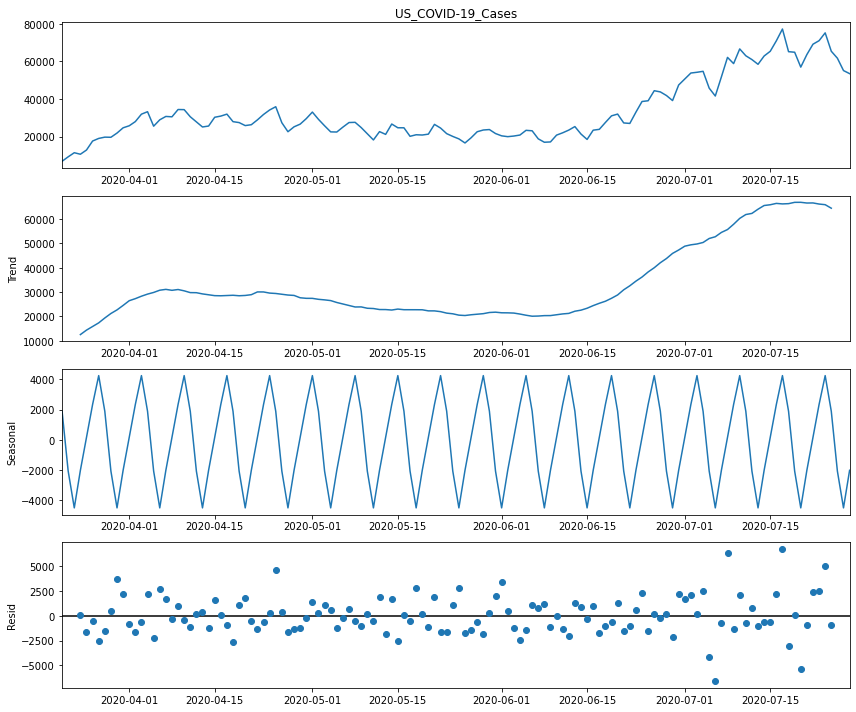

In [3]:
plt.rcParams.update({'figure.figsize': (12,10)}) #width, height 

case_col = datafram['US_COVID-19_Cases']

result = seasonal_decompose(case_col, model='Multiplicative' )

result.plot()
plt.show()


**ARIMA Modeling for Time Series Forecasting**<br><br>
**AR(p) Autoregression** - refers to the use of past values in the regression equation for the time series. P is the number of lags to consider into the model.<br>
**I(d) Integration**- uses differencing of observations (current observation minus previous time step observation). d is the number of differences to take <br>
**MA(q) Moving Average** - moving average component depicts the number of error terms to be included which is denoted by q terms.<br>

**m** = The period for seasonal differencing, 7 for daily, 12 for monthly, 52 for weekly, 1 for annually<br>
**P** - seasonal components for Auto Regression<br>
**D** - seasonal components for Integration<br>
**Q** - seasonal components for Moving Average<br>

There are start values and max values that are defined for the **auto_arima** automatically find the best parameters<br>

In [4]:
auto_model = auto_arima(case_col, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 7,   
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True) 

auto_model.summary() 

Performing stepwise search to minimize aic
Fit ARIMA(1,0,1)x(0,1,1,7) [intercept=True]; AIC=2320.755, BIC=2334.816, Time=0.178 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=True]; AIC=2494.537, BIC=2500.161, Time=0.015 seconds
Fit ARIMA(1,0,0)x(1,1,0,7) [intercept=True]; AIC=2327.146, BIC=2338.395, Time=0.311 seconds
Fit ARIMA(0,0,1)x(0,1,1,7) [intercept=True]; AIC=2438.177, BIC=2449.425, Time=0.076 seconds
Fit ARIMA(0,0,0)x(0,1,0,7) [intercept=False]; AIC=2519.154, BIC=2521.966, Time=0.009 seconds
Fit ARIMA(1,0,1)x(0,1,0,7) [intercept=True]; AIC=2336.716, BIC=2347.965, Time=0.067 seconds
Fit ARIMA(1,0,1)x(1,1,1,7) [intercept=True]; AIC=2322.604, BIC=2339.477, Time=0.234 seconds
Fit ARIMA(1,0,1)x(0,1,2,7) [intercept=True]; AIC=2322.565, BIC=2339.438, Time=0.396 seconds
Fit ARIMA(1,0,1)x(1,1,0,7) [intercept=True]; AIC=2321.141, BIC=2335.202, Time=0.141 seconds
Fit ARIMA(1,0,1)x(1,1,2,7) [intercept=True]; AIC=2322.303, BIC=2341.989, Time=1.380 seconds
Fit ARIMA(1,0,0)x(0,1,1,7) [intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  130
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1155.377
Date:                           Thu, 30 Jul 2020   AIC                           2320.755
Time:                                   14:02:23   BIC                           2334.816
Sample:                                        0   HQIC                          2326.466
                                           - 130                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.9987    194.798      0.149      0.882    -352.798     410.796
ar.L1          0.9596      0.031     30.652      0.000       0.898       1.021
ma.L1         -0.2957      0.115     -2.570      0.010      -0.521      -0.070
ma.S.L7       -0.4547      0.108     -4.211      0.000      -0.666      -0.243
sigma2      9.739e+06   9.71e-05      1e+11      0.000    9.74e+06    9.74e+06
===================================================================================
Ljung-Box (Q):                       31.38   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.83   Prob(JB):                         0.17
Heteroskedasticity (H):               1.86   Skew:                            -0.24
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.98e+28. Standard errors may be unstable.
"""

In [5]:
p, d, q = auto_model.get_params()['order']   #unwarping the order tuple to save the auto selected arima values in to selected variables
  
P, D, Q, m = auto_model.get_params()['seasonal_order']  #unwarping the seasonal order tuple to save the auto selected seasonal arima values in to selected variables

**The training and testing data will be split into two parts. We will use all months from March till June for trainning, and use the last 30 days of the data set up till July 27th as the training data.**

In [6]:
# Split data into train / test sets 
train = datafram.iloc[:len(datafram)-30] #there are 140 days and we are saving the last 30days for testing
test = datafram.iloc[len(datafram)-30:] #the next 30 days is going to be used for testing
  

from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(case_col,  
                order = (p, d, q),  
                seasonal_order =(P, D, Q, m)) 
  
result = model.fit() 
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                 US_COVID-19_Cases   No. Observations:                  130
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 7)   Log Likelihood               -1155.381
Date:                           Thu, 30 Jul 2020   AIC                           2318.761
Time:                                   14:02:23   BIC                           2330.010
Sample:                               03-21-2020   HQIC                          2323.330
                                    - 07-28-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9627      0.020     49.285      0.000       0.924       1.001
ma.L1         -0.2992      0.113     -2.657      0.008      -0.520      -0.079
ma.S.L7       -0.4526      0.107     -4.226      0.000      -0.663      -0.243
sigma2      9.739e+06   2.19e-09   4.45e+15      0.000    9.74e+06    9.74e+06
===================================================================================
Ljung-Box (Q):                       31.12   Jarque-Bera (JB):                 3.73
Prob(Q):                              0.84   Prob(JB):                         0.15
Heteroskedasticity (H):               1.87   Skew:                            -0.26
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.02e+32. Standard errors may be unstable.
"""

**With the model we trainned with the training data will now be put up against the test data set (30 days of the data set up till July 27th)to see how the model compares**

Text(0, 0.5, 'COVID-19 Cases')

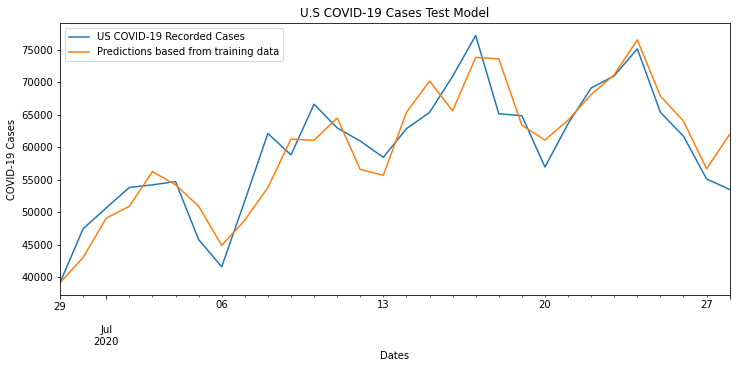

In [7]:
start = len(train) 
end = len(train) + len(test) - 1

# Predictions for one-month against the test set 
predictions = result.predict(start, end, typ = 'levels').rename("Predictions based from training data") 

# plot predictions and actual values 
test['US_COVID-19_Cases'].plot(legend = True, label = "US COVID-19 Recorded Cases")
predictions.plot(legend = True, figsize = (12, 5)) 
plt.title("U.S COVID-19 Cases Test Model")
plt.xlabel('Dates')
plt.ylabel('COVID-19 Cases')


**To accurately forcast data for the future it will be better to use the full data set as trainning data to most accurately train the model, so we can get a better picture of the future.**<br>
**Here we have built the model to show the forecast for the future next 30 days**

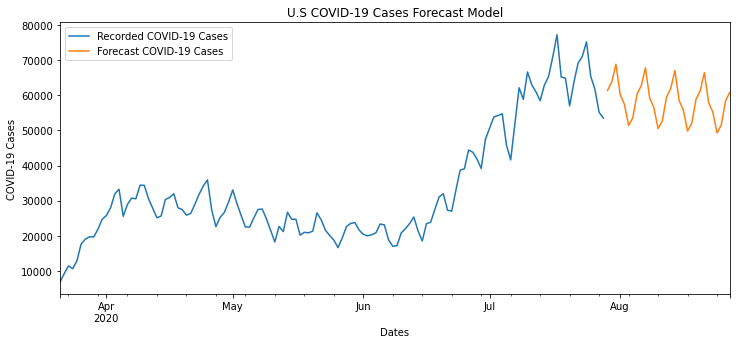

In [9]:
# Train the model on the full dataset 

model = SARIMAX(case_col,        
                order = (p, d, q),  
                seasonal_order =(P, D, Q, m))  # we used the enite dataset this as training data    
result = model.fit()     # we are trying to fit our predicted graph close to the data
  

forecast = result.predict(start = len(datafram),  
                          end = (len(datafram)-1) + 30,  
                          typ = 'levels').rename('Forecast COVID-19 Cases') #extending the forecast by 30 days
  
# Plot the forecast values 
case_col.plot(figsize = (12, 5), legend = True,label = "Recorded COVID-19 Cases") 
forecast.plot(legend = True)
plt.xlabel('Dates')
plt.ylabel('COVID-19 Cases')
plt.title("U.S COVID-19 Cases Forecast Model")
plt.show()